# Unterscheidung aller Filter mittels Keras-Sequential-Modell

## Import der notwendigen Pakete

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

## GPU-Test 

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))

Num GPUs Available 1


## Import des Datasets

Das Datenset FACD_image umfasst 23 Ordner die jeweils 1280 Bilder enthalten, die mit dem gleichen Gimp-Filter bearbeitet wurden. Über den ImageDataGenerator und den Directory können die Bilder bereits beim Laden entsprechend vorbearbeitet werden. Hierfür wird die preprocess-function des VGG16 Modells verwendet. Zusätzlich werden die Bilder auf eine größe von 224x224 Skaliert und mit RBG Farbwerten gespeichert. 

In [3]:
# path to dataset
directory = "./FACD_image"
target_size = (224,224)
seed = 42;
batch_size=10

# create a image generator for keras, that can load images batchwise
data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.2)

train_batches = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size, color_mode='rgb', batch_size=batch_size, shuffle=True, seed=seed,
    subset='training'
)

valid_batches = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size,  color_mode='rgb', batch_size=batch_size, shuffle=True, seed=seed, 
    subset='validation'
)    

Found 23552 images belonging to 23 classes.
Found 5888 images belonging to 23 classes.


## Erstellung des Modells

Als Modell wird das Sequential Modell von Keras verwendet. 

In [4]:
#Definition des Modells
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)), 
    MaxPool2D(pool_size=(2, 2), strides=2), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), 
    Dense(units=23, activation='softmax'),
])

#Ausgeben einer Zusammenfassung 
model.summary()


#Compilieren und fürs Trainieren Vorbereiten
metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 23)                4616215   
Total params: 4,635,607
Trainable params: 4,635,607
Non-trainable params: 0
______________________________________________

## Trainieren des Modells 

In [7]:
epochs = 20
validation_freq = 1
filepath = "./second_try_dennis_checkpointsave.hdf5"

es=tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.002, patience=0, verbose=0, mode='min',
    baseline=None, restore_best_weights=False
)

mc=tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch'
)

history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=epochs, 
    steps_per_epoch=len(train_batches), 
    validation_freq=validation_freq,
    verbose=1, 
    workers=4,
    callbacks=[es, mc]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2356 steps, validate for 589 steps
Epoch 1/20
 857/2356 [=========>....................] - ETA: 1:21 - loss: 0.5679 - categorical_accuracy: 0.8352 - precision: 0.8794 - recall: 0.7846

C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19273 bytes but only got 816. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5140 bytes but only got 816. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3144 bytes but only got 816. Skipping tag 34675
  " Skipping tag %s" % (size, len(data), tag)


2356/2356 [==============================] - 206s 88ms/step - loss: 0.6620 - categorical_accuracy: 0.8071 - precision: 0.8589 - recall: 0.7531 - val_loss: 0.9675 - val_categorical_accuracy: 0.7096 - val_precision: 0.8027 - val_recall: 0.6342
Epoch 2/20
2356/2356 [==============================] - 205s 87ms/step - loss: 0.5115 - categorical_accuracy: 0.8497 - precision: 0.8851 - recall: 0.8142 - val_loss: 0.9466 - val_categorical_accuracy: 0.7306 - val_precision: 0.7994 - val_recall: 0.6858
Epoch 3/20
2356/2356 [==============================] - 204s 86ms/step - loss: 0.4463 - categorical_accuracy: 0.8667 - precision: 0.8939 - recall: 0.8357 - val_loss: 1.0338 - val_categorical_accuracy: 0.7142 - val_precision: 0.7757 - val_recall: 0.6743
Epoch 4/20
2356/2356 [==============================] - 197s 83ms/step - loss: 0.3477 - categorical_accuracy: 0.8942 - precision: 0.9135 - recall: 0.8747 - val_loss: 1.1243 - val_categorical_accuracy: 0.7191 - val_precision: 0.7657 - val_recall: 0.6860

## Plotten der Lern und Fehlerkurve

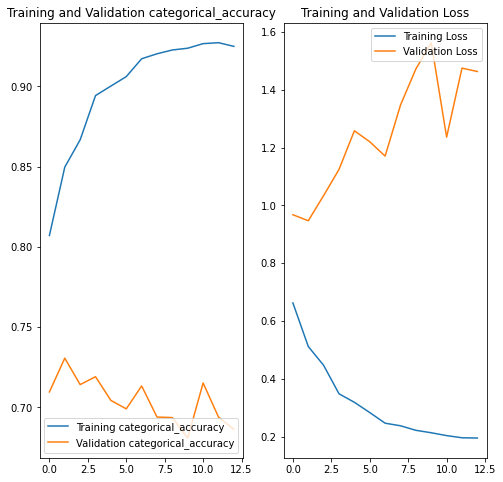

In [10]:
import plot

plot.plot_keras_history(history, len(history.epoch), metrics[0].name)

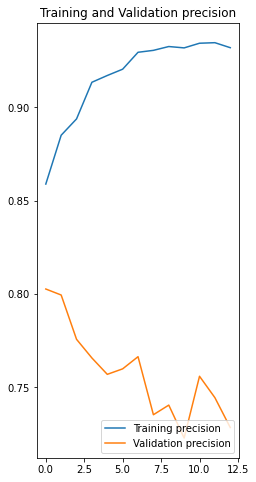

In [11]:
plot.plot_keras_history(history, len(history.epoch), metrics[1].name)

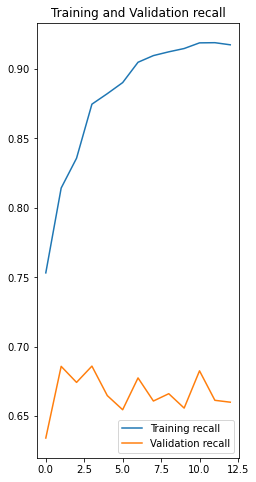

In [12]:
plot.plot_keras_history(history, len(history.epoch), metrics[2].name)